In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import moment
import math
from collections import Counter

from sklearn import preprocessing
from scipy.stats import binom


In [2]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),       # 1 points vertical offset
                    textcoords="offset points",
                    size=6,              
                    ha='center',va='bottom')

In [3]:
def monthcount(df,m):
    month_count = []
    
    start = QD[0]
    index = 0
    for i in range(int(144/m)):
        
        start = QD[index]
        if index + m ==144:
            end = '2021'
        else:
            end = QD[index+m]
        
        #print(i, index, start, end)
        df_temp = df[(df['CreationDate']>start)&(df['CreationDate']<end)]
        month_count.append(len(df_temp))
        index = index+m
        
    return month_count

In [40]:
def cox_stuart_trend(l):
    if len(l)%2 == 1:
        l.pop(int((len(l)-1)/2))
    half = int(len(l)/2)
    first = l[:half]
    second = l[half:]
    
    diff = [(i - j) for i, j in zip(first, second)]
    diff = [np.sign(x) for x in diff]
    
    pos = diff.count(1)
    neg = diff.count(-1)
    
    if pos == neg :
        return ('/',0.5)
    elif pos>neg:
        return ('-', binom.pmf(neg,neg+pos,0.5))
    else:
        return ('+', binom.pmf(pos,neg+pos,0.5))

In [37]:
def trend(m):
    month_count = monthcount(df,m)
    answered = df[df["AcceptedAnswerId"].notnull()]
    answered = answered.reset_index(drop = True) 
    answer_count  =  monthcount(answered, m)
    answerrate = [(i / j) for i, j in zip(answer_count, month_count)]
    
    cox =[]
    
    for i in range (1, 41):
        df_temp = df[df["TBAA_RL_Pred"]==i]
        df_temp = df_temp.reset_index(drop = True) 
        month_count_temp = monthcount(df_temp, m)
        month_count_temp = [1 if x==0 else x for x in month_count_temp]

        answered = df_temp[df_temp["AcceptedAnswerId"].notnull()]
        answered = answered.reset_index(drop = True) 
        answer_count_temp =  monthcount(answered, m)
        
        
        
        #print(month_count_temp)
        #print(answerrate)
        answerrate_temp = [(k / j) for k, j in zip(answer_count_temp, month_count_temp)]
        month_count_pro = [(k / j) for k, j in zip(month_count_temp, month_count)]
        answerrate_diff = [(k - j) for k, j in zip(answerrate_temp, answerrate)]
        
        
        tr, p = cox_stuart_trend(answerrate_temp)
        tr2, p2 = cox_stuart_trend(answerrate_diff)
        tr3, p3 = cox_stuart_trend(month_count_pro)
        
        cox.append([i,tr, p, tr2, p2, tr3, p3])


        plt.figure(figsize=(15,10),dpi=25,linewidth = 2)
        #plt.plot(month_count_temp,color = 'g', label="topic " +str(i))
        plt.plot(answerrate_diff,color = 'k', label="topic -all answer rate")
        plt.plot(month_count_pro,color = 'b', label="proportion")
        plt.plot(answerrate,color = 'r', label="all answer rate")
        plt.plot(answerrate_temp,color = 'g', label="topic answer rate ")
        plt.title('python post by '+str(m)+' month \ntopic '  +str(i)+' '+topics[i-1] ,fontsize=38)
        plt.ylabel('frequency') 
        plt.xlabel('month')

        plt.legend()
    return cox


In [7]:
df = pd.read_csv("Q_pred50.csv")

#只選用整年份的資料
df = df[(df['CreationDate']>'2009')&(df['CreationDate']<'2021')]

/Users/wuyunwei/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
#所有資料的月份
QD = df["CreationDate"].tolist()
QD = [d[:7] for d in QD]
QD = list(dict.fromkeys(QD).keys())
QD = sorted(QD)

In [1]:
topics = [
    "pd & np -shape & type", "rasberry-pi", "flask & SQL", "read excel/csv", "SQL/mySQL",
    "tweeter", "image", "amz/ apche-spark", "django-model", "dictionary",
    "log", "ctype", "string", "selenium", "pd & np",
    "b4s & scraping-html/css", "pygame", "time", "general", "read txt",
    "ssl & google", "mixed-error", "plt", "path & os", "math",
    "tkinder", "if & loop", "tree", "oop", "django-loggin",
    "multithreading", "scraping & b4s-request", "list", "tensorflow", "video",
    "html & css", "environment", "django-request", "discord", "encode"
]

<ipython-input-37-3828261017d0>:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,10),dpi=25,linewidth = 2)


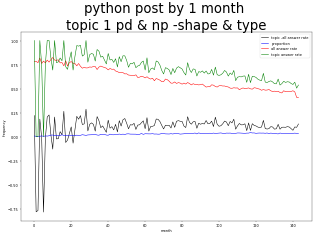

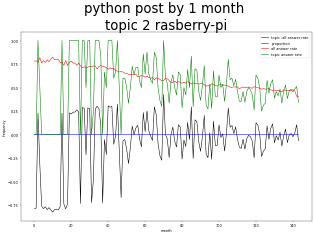

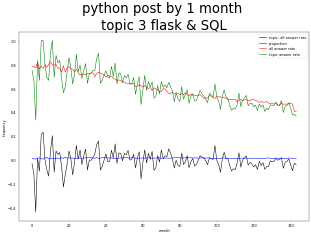

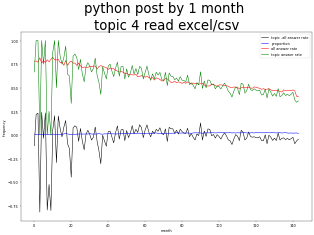

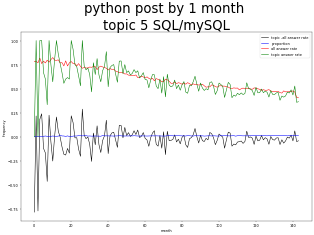

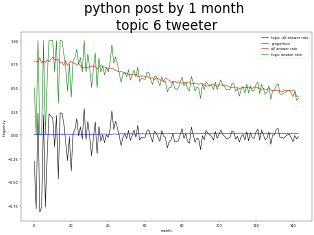

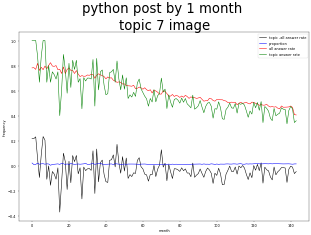

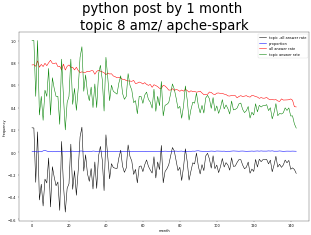

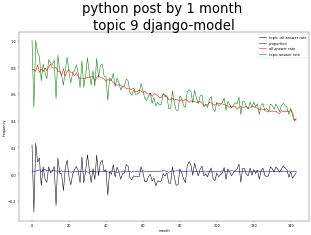

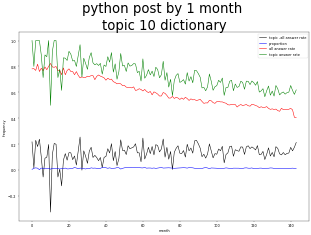

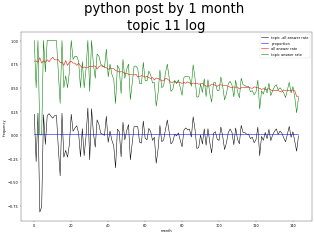

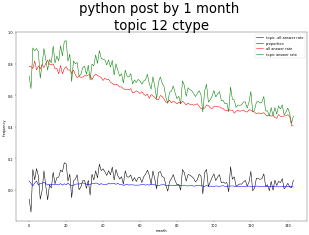

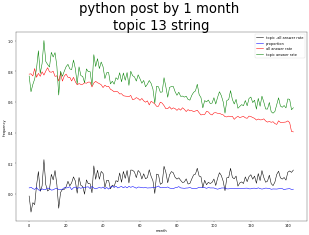

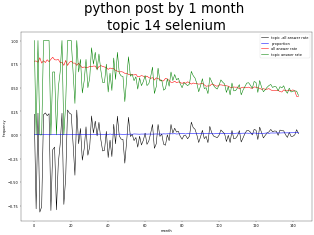

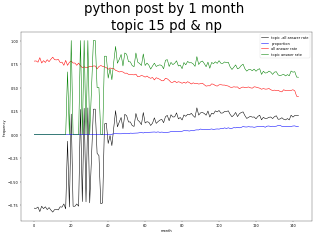

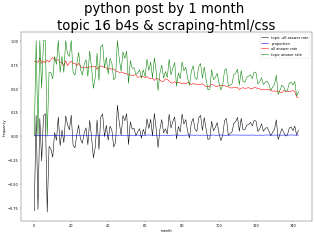

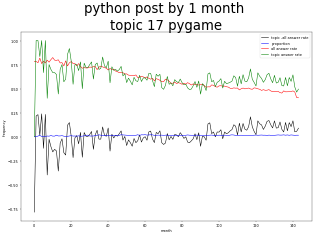

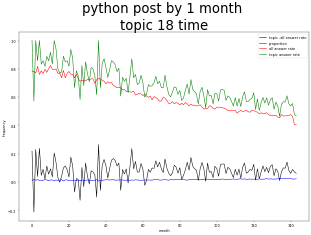

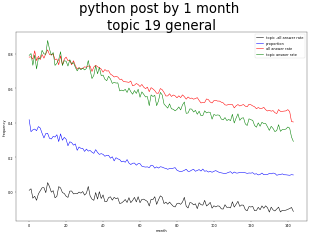

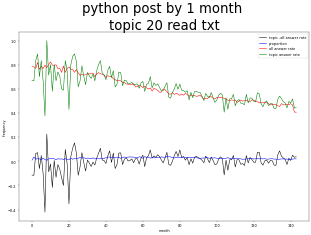

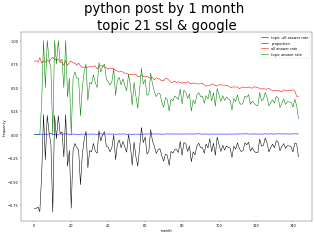

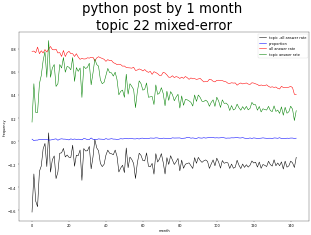

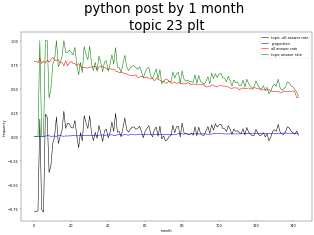

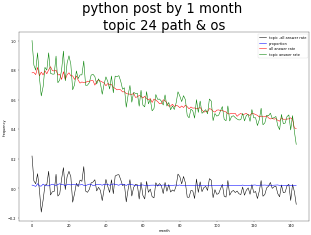

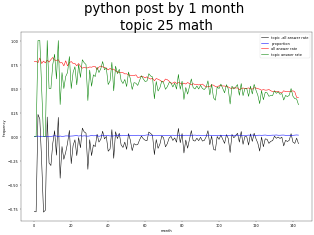

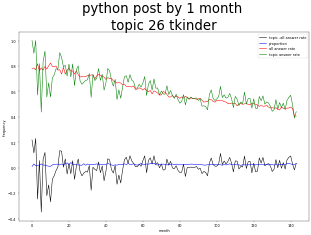

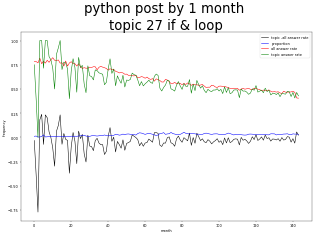

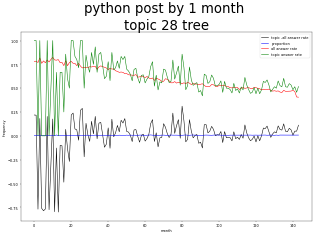

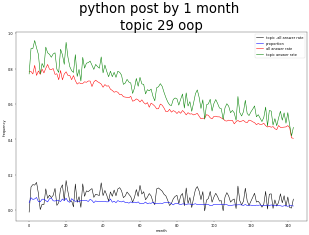

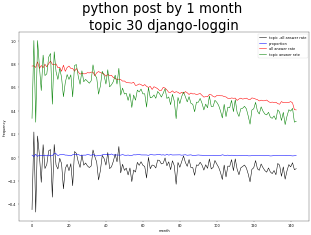

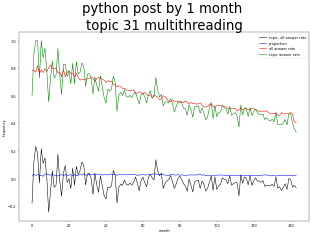

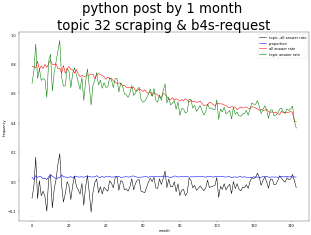

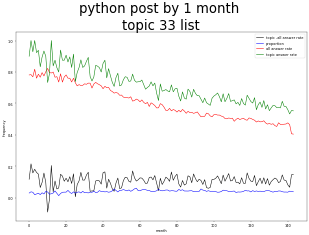

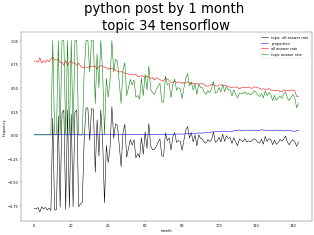

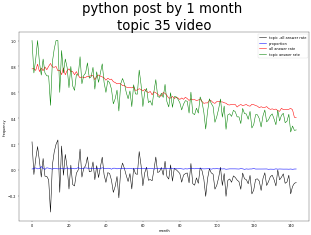

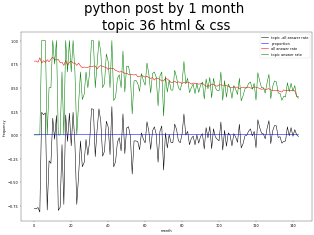

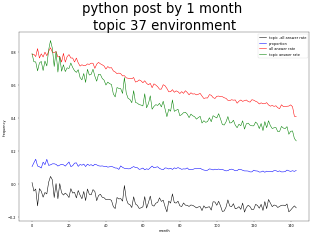

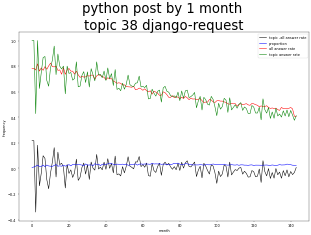

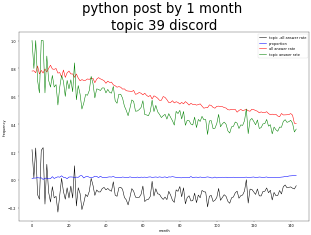

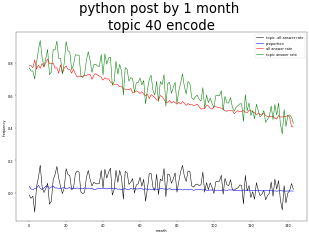

In [56]:
# Display trend chart for the forty topics
cox1 = trend(1)

In [51]:
# trend test and diff value for the forty topics
df_cox1 = pd.DataFrame(cox1, columns = ['topic', 'topic AR', 'pval', 'topic-all AR', 'pval2', 'topic pro', 'pval3'])
df_cox1

,topic,topic AR,pval,topic-all AR,pval2,topic pro,pval3
0,1,-,1.262926e-17,+,7.320916e-02,+,1.524659e-20
1,2,-,1.542325e-02,+,4.713956e-02,+,1.501524e-08
2,3,-,1.524659e-20,-,2.427452e-02,-,3.232384e-03
3,4,-,2.534538e-12,-,5.843156e-03,+,5.412541e-19
4,5,-,2.178548e-16,-,7.320916e-02,+,1.135473e-10
5,6,-,3.119431e-13,-,7.320916e-02,+,1.524659e-20
6,7,-,5.412541e-19,-,3.479348e-02,+,1.599912e-02
7,8,-,2.446769e-07,+,1.599912e-02,+,6.399938e-10
8,9,-,5.412541e-19,+,4.713956e-02,-,6.039756e-02
9,10,-,2.178548e-16,+,2.427452e-02,-,7.320916e-02
